## In-class practice for Lecture 18

* Time series analysis: Time series decomposition
* New Python tricks: Pandas rolling() and statsmodel.tsa
* Answer each question using Python codes in a separate cell

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline

### 1. Trend and seasonal decomposition using tsa

Use the "Monthly_CO2_Concentrations.xlsx" dataset, perform a seasonal_decompose of the CO2 concentrations using the "multiplicative" method. Compare the results to the "additive" method used in the class lecture.

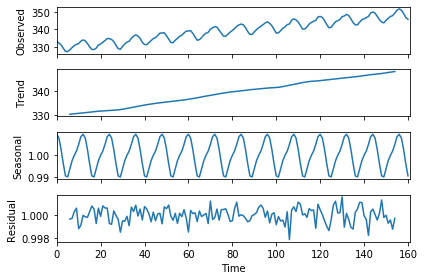

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_excel('../Datasets/Monthly_CO2_Concentrations.xlsx')

# time series decomposition
result = seasonal_decompose(data.CO2.tolist(), freq=12,model='multiplicative')
result.plot()
plt.show()

### 2.  Trend decomposition using a moving average window

Download the data file "monthly-lake-erie-levels-1921-19.xlsx" from Moodle. The data file contains two columns: Time (in months) and Levels of Lake Erie, between 1921 and 1970

- load the excel file into Python as a Pandas data frame. In this file, you need to skip several rows using **skiprows = 8** and also set the index column as the "Month" column using **index_col = 0**. Make sure you understand the meaning of these options.
- take a look at the data frame use the **.head()** function, what's the data cadence?
- use the **DataFrame_Name[XX].plot()** function  (**DataFrame_Name** is the name of your data frame, XX is the name of the data column in your data frame) to visualize the variation of the level of Lake Erie
- Use the .rolling() function, to generate three moving averages plots for the levels of lake erie with a window of 12 months, which is a trend by removing short-term variations (<12 moths)
- subtract the trend from the original data to get the short-term variations. Is it purely seasonal?

In [3]:
data = pd.read_excel('../Datasets/monthly-lake-erie-levels-1921-19.xlsx',skiprows = 8, index_col = 0)
data.head()

,Levels,Unnamed: 2
Month,,
1921-01-01,14.763,NaN
1921-02-01,14.649,NaN
1921-03-01,15.085,NaN
1921-04-01,16.376,NaN
1921-05-01,16.926,NaN


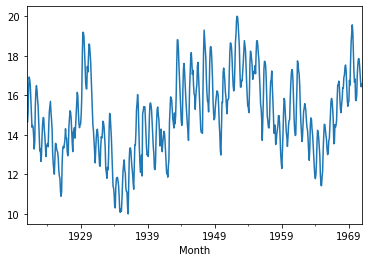

In [4]:
data['Levels'].plot()

Text(0.5, 1.0, 'Rolling mean of levels')

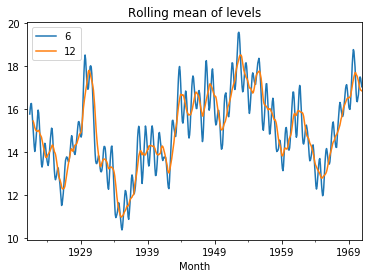

In [5]:
# try 12 an d6 month rolling mean
rol = [6, 12]

for i in rol: # use a for-loop here
    data['mean']=data['Levels'].rolling(i).mean()
    data['mean'].plot(label=i)

plt.legend()
plt.title('Rolling mean of levels')

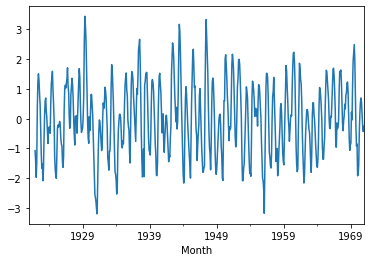

In [6]:
data['resid'] = data['Levels'] - data['mean'] # compute a residual
data['resid'].plot()

It looks some what like seasonal but with variations - so not exactly seasonal, you can zoom in and see the details:

### 3.  Trend decomposition using linear regression

Download the data file "Monthly_CO2_Concentrations.xlsx" from Moodle

- load the excel file into Python as a data frame
- plot the CO2 concentration as a function of months (here the data sampling cadence is one month, so you can just plot the CO2 concentration using the default Pandas index)
- Recall the curve fitting process, do a linear curve fitting ($y = ax+b$) to the CO2 concentration data
- Subtract the linear curve from the original CO2 concentration to get the residule
- How does your linear trend compared to the rolling() results used in the lecture?

,Unnamed: 0,CO2,Year,Month,month
0,0,333.13,1974,5,0
1,1,332.09,1974,6,1
2,2,331.10,1974,7,2
3,3,329.14,1974,8,3
4,4,327.36,1974,9,4


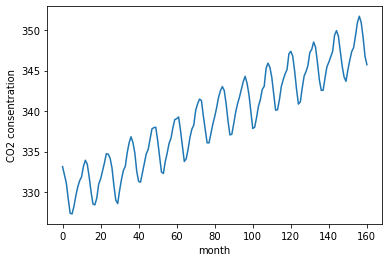

In [13]:
data = pd.read_excel('Monthly_CO2_Concentrations.xlsx')
#data.head()
data.CO2.plot()
plt.xlabel('month')
plt.ylabel('CO2 consentration')
#data.rename(columns={'Unnamed: 0':'month'},inplace=True)
data.head(62)
month = np.arange(data.CO2.size)
data['month'] = month
data.head()

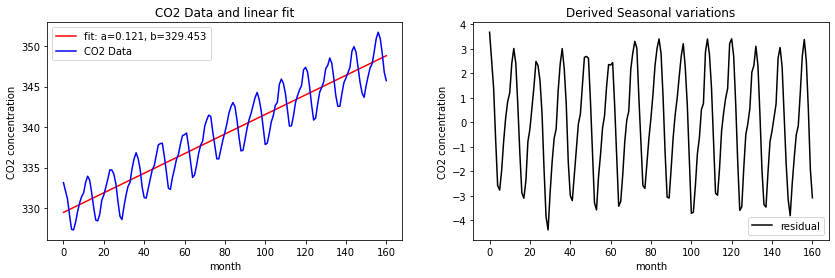

In [14]:
from scipy.optimize import curve_fit # import function curve_fit

# define a linear function
def func(x, a, b):
    return a *x + b

data = data.dropna()
popt, pcov = curve_fit(func, data.month, data.CO2) # curve fitting, popt has the a,b,c calculated by SciPy

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.plot(data.month, func(data.month, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt)) # Plot the results
plt.plot(data.month, data.CO2, 'b', label='CO2 Data') # plot the original data
plt.legend()
plt.xlabel('month')
plt.ylabel('CO2 concentration')
plt.title('CO2 Data and linear fit')

plt.subplot(1,2,2)
plt.plot(data.month, data.CO2-func(data.month, *popt), 'k-',label='residual') # Plot the results
plt.legend()
plt.xlabel('month')
plt.ylabel('CO2 concentration')
plt.title('Derived Seasonal variations')
plt.show()

now compare to the rolling method:

Text(0.5, 1.0, 'Linear fit versus rolling mean')

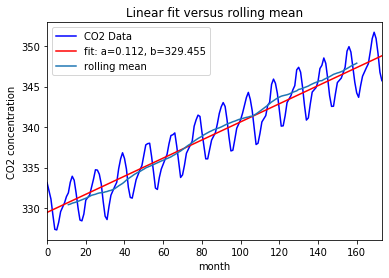

In [9]:
plt.plot(data.month, data.CO2, 'b', label='CO2 Data') # plot the original data
plt.plot(data.month, func(data.month, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt)) # Plot the results
data['CO2'].rolling(12).mean().plot(label = 'rolling mean') # plot the rolling mean 
plt.legend()
plt.xlabel('month')
plt.ylabel('CO2 concentration')
plt.title('Linear fit versus rolling mean')

so the rolling mean is quite consistent with the linear fitting method!